In [2]:
import time
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
#This file is a pured crawled data
cars = pd.read_csv(r'C:\Users\Alon\Desktop\קורסים\מדעי הנתונים\cars_data_lvl1done.csv', index_col  = 'index')
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 4905
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   version               3002 non-null   object 
 1   year                  3002 non-null   int64  
 2   engine                3002 non-null   object 
 3   current_mileage       3002 non-null   object 
 4   hand                  3002 non-null   int64  
 5   gearBox               3002 non-null   object 
 6   color                 3002 non-null   object 
 7   original_onership     3002 non-null   object 
 8   next_test_in          3002 non-null   object 
 9   annual_licensing_fee  3002 non-null   object 
 10  car_length            3002 non-null   float64
 11  price                 3002 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 304.9+ KB


In [204]:
#we have got 2057 cars but just 573 different types. so we need to try to get more...
len(cars.version.unique())

928

In [213]:
cars.version.unique()
#we saw here that we need to split the "version" column to two columns : "CompanyName" and "version":
CompanyName = cars['version'].apply(lambda x : x.split(' ')[0])
cars.insert(2,"CompanyName",CompanyName)
cars

,version,year,CompanyName,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,2021,קופרה,1498 ליטר בנזין,"10,000",1,1,לבן,פרטית,5,"‏2,417 ₪",445.0,176000
1,טויוטה קורולה GLI,2011,טויוטה,1598 ליטר בנזין,"71,000",2,1,כסף,פרטית,4,"‏1,262 ₪",454.5,45000
2,קיה פיקנטו LX,2020,קיה,1248 ליטר בנזין,"16,500",2,1,לבן,פרטית,9,"‏1,235 ₪",359.5,79900
3,הונדה סיוויק COMFORT,2014,הונדה,1798 ליטר בנזין,"144,000",2,1,אפור,חברה,2,"‏1,424 ₪",430.0,44900
4,פיאט 500 1.2 POP STAR,2017,פיאט,1242 ליטר בנזין,"69,000",1,1,לבן,פרטית,2,"‏1,353 ₪",357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,סקודה קודיאק AMBITION,2017,סקודה,1395 ליטר בנזין,"159,800",1,1,זהב,ליסינג,5,"‏2,019 ₪",448.0,132000
4899,סקודה פאביה AMBITION,2016,סקודה,1197 ליטר בנזין,"140,000",3,1,שחור מטלי,ליסינג,4,"‏1,102 ₪",399.2,59000
4903,מאזדה 3,2020,מאזדה,1998 ליטר בנזין,"14,500",1,1,אפור,פרטית,11,"‏2,130 ₪",466.0,130500


In [214]:
car_names = cars.CompanyName.unique()
car_names

array(['קופרה', 'טויוטה', 'קיה', 'הונדה', 'פיאט', 'סיאט', 'יונדאי', 'MG',
       'סקודה', 'מאזדה', 'שברולט', 'ניסאן', 'טסלה', 'רנו', "פיג'ו",
       'סוזוקי', 'פולקסווגן', "ג'יפ", 'פורד', 'סובארו', 'מיצובישי',
       'ב.מ.וו', 'סיטרואן', 'אאודי', 'לקסוס', 'מרצדס', 'איסוזו', 'אופל',
       'קרייזלר', 'וולבו', 'לנד', "דאצ'יה", 'מיני', 'סאנגיונג', 'ביואיק',
       'אלפא', 'אינפיניטי', "דודג'", 'קאדילאק', 'SERES', 'סמארט', 'DS',
       'פורשה', 'דייהטסו', 'מזארטי', 'GAC'], dtype=object)

In [69]:
#a function that convernt company name to english
def itemToEnglish (item):
    if (item == "אלפא"): 
        item = 'alfa-romeo'  
    elif (item =='ניסאן'): 
        item = 'nissan'
    elif (item == "מאזדה"): 
        item = 'mazda'
    elif (item == "סובארו"): 
        item = 'subaru'
    elif (item == "מרצדס"): 
        item = 'mercedes'
    elif (item == "סיאט"): 
        item = 'siat'   
    elif (item == "סיטרואן"): 
        item = 'citroen'   
    elif (item == "טויוטה"): 
        item = 'toyota'   
    elif (item =="ג'יפ"): 
        item = 'jeep'   
    elif (item == "קיה"): 
        item = 'kia'   
    elif (item == "יונדאי"): 
        item = 'hyundai'   
    elif (item == "דייהטסו"): 
        item = 'daihatsu'   
    elif (item == "פורשה"): 
        item = 'porsche'   
    elif (item == "פיאט"): 
        item = 'fiat'   
    elif (item == "פורד"): 
        item = 'ford'   
    elif (item == "סוזוקי"): 
        item = 'suzuki'   
    elif (item == "דאצ'יה"): 
        item = 'dacia'   
    elif (item == "ב.מ.וו"): 
        item = 'bmw'   
    elif (item == "פיג'ו"): 
        item = 'peugeot'   
    elif (item == "מיצובישי"): 
        item = 'mitsubishi'   
    elif (item == "פולקסווגן"): 
        item = 'volkswagen'   
    elif (item == "רנו"): 
        item = 'reno' 
    elif (item == "הונדה"): 
        item = 'honda' 
    elif (item == "אאודי"): 
        item = 'audi' 
    elif (item == "סקודה"): 
        item = 'skoda' 
    elif (item == "מיני"): 
        item = 'mini' 
    elif (item == "אינפיניטי"): 
        item = 'infinity'
    elif (item == "לנד"): 
        item = 'landrover' 
    elif (item == "שברולט"): 
        item = 'chevrolet'
    elif (item == "אופל"): 
        item = 'opel'
    elif (item == "MG"): 
        item = 'MG'
    elif (item == "טסלה"): 
        item = 'tesla'
    elif (item == "'דודג"): 
        item = 'dodge'
    elif (item == "ביואיק"): 
        item = 'buick'
    elif (item == "יגואר"): 
        item = 'jaguar'   
    elif (item == "לקסוס"): 
        item = 'lexus' 
    elif (item == "סמארט"): 
        item = 'smart'
    elif (item == "סאנגיונג"): 
        item = 'sangiang'
    elif (item == "קאדילק"): 
        item = 'cadillac'
    elif (item == "קופרה"): 
        item = 'cupra'   
    elif (item == "קרייזלר"): 
        item = 'chrysler'
    elif (item == "מזארטי"): 
        item = 'maserati' 
    elif (item == "וולבו"): 
        item = 'volvo'
    elif (item == "איסוזו"): 
        item = 'isuzu'
    elif (item == "GMC"): 
        item = 'gmc'
    elif (item == 'DS'):
        item = 'ds'
    elif (item == "קאדילאק"):
        item = 'cadillac'
    elif (item == 'SERES'):
        item = 'seres'
    return item

In [216]:
#change the "gearBox" column to number:
cars.replace({'gearBox': 'ידני' } ,2 , inplace = True)

cars.replace({'gearBox': 'אוטומטי' } , 1 , inplace = True)
    
#cars.drop(columns=['index' , 'index.1' , 'index.1.1'])
cars

,version,year,CompanyName,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,2021,קופרה,1498 ליטר בנזין,"10,000",1,1,לבן,פרטית,5,"‏2,417 ₪",445.0,176000
1,טויוטה קורולה GLI,2011,טויוטה,1598 ליטר בנזין,"71,000",2,1,כסף,פרטית,4,"‏1,262 ₪",454.5,45000
2,קיה פיקנטו LX,2020,קיה,1248 ליטר בנזין,"16,500",2,1,לבן,פרטית,9,"‏1,235 ₪",359.5,79900
3,הונדה סיוויק COMFORT,2014,הונדה,1798 ליטר בנזין,"144,000",2,1,אפור,חברה,2,"‏1,424 ₪",430.0,44900
4,פיאט 500 1.2 POP STAR,2017,פיאט,1242 ליטר בנזין,"69,000",1,1,לבן,פרטית,2,"‏1,353 ₪",357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,סקודה קודיאק AMBITION,2017,סקודה,1395 ליטר בנזין,"159,800",1,1,זהב,ליסינג,5,"‏2,019 ₪",448.0,132000
4899,סקודה פאביה AMBITION,2016,סקודה,1197 ליטר בנזין,"140,000",3,1,שחור מטלי,ליסינג,4,"‏1,102 ₪",399.2,59000
4903,מאזדה 3,2020,מאזדה,1998 ליטר בנזין,"14,500",1,1,אפור,פרטית,11,"‏2,130 ₪",466.0,130500


In [217]:
#change the "next_test_in" column to number:
cars['next_test_in'] = cars['next_test_in'].apply(lambda x : x.split(' ')[0])
cars

,version,year,CompanyName,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,2021,קופרה,1498 ליטר בנזין,"10,000",1,1,לבן,פרטית,5,"‏2,417 ₪",445.0,176000
1,טויוטה קורולה GLI,2011,טויוטה,1598 ליטר בנזין,"71,000",2,1,כסף,פרטית,4,"‏1,262 ₪",454.5,45000
2,קיה פיקנטו LX,2020,קיה,1248 ליטר בנזין,"16,500",2,1,לבן,פרטית,9,"‏1,235 ₪",359.5,79900
3,הונדה סיוויק COMFORT,2014,הונדה,1798 ליטר בנזין,"144,000",2,1,אפור,חברה,2,"‏1,424 ₪",430.0,44900
4,פיאט 500 1.2 POP STAR,2017,פיאט,1242 ליטר בנזין,"69,000",1,1,לבן,פרטית,2,"‏1,353 ₪",357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,סקודה קודיאק AMBITION,2017,סקודה,1395 ליטר בנזין,"159,800",1,1,זהב,ליסינג,5,"‏2,019 ₪",448.0,132000
4899,סקודה פאביה AMBITION,2016,סקודה,1197 ליטר בנזין,"140,000",3,1,שחור מטלי,ליסינג,4,"‏1,102 ₪",399.2,59000
4903,מאזדה 3,2020,מאזדה,1998 ליטר בנזין,"14,500",1,1,אפור,פרטית,11,"‏2,130 ₪",466.0,130500


In [219]:
cars_fewColumns = cars.iloc[: , [0,2, 4 , 5 ,6  ,7, 9 ,10, 11]]
cars_fewColumns

,version,CompanyName,current_mileage,hand,gearBox,color,next_test_in,annual_licensing_fee,car_length
index,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,"10,000",1,1,לבן,5,"‏2,417 ₪",445.0
1,טויוטה קורולה GLI,טויוטה,"71,000",2,1,כסף,4,"‏1,262 ₪",454.5
2,קיה פיקנטו LX,קיה,"16,500",2,1,לבן,9,"‏1,235 ₪",359.5
3,הונדה סיוויק COMFORT,הונדה,"144,000",2,1,אפור,2,"‏1,424 ₪",430.0
4,פיאט 500 1.2 POP STAR,פיאט,"69,000",1,1,לבן,2,"‏1,353 ₪",357.1
...,...,...,...,...,...,...,...,...,...
4898,סקודה קודיאק AMBITION,סקודה,"159,800",1,1,זהב,5,"‏2,019 ₪",448.0
4899,סקודה פאביה AMBITION,סקודה,"140,000",3,1,שחור מטלי,4,"‏1,102 ₪",399.2
4903,מאזדה 3,מאזדה,"14,500",1,1,אפור,11,"‏2,130 ₪",466.0


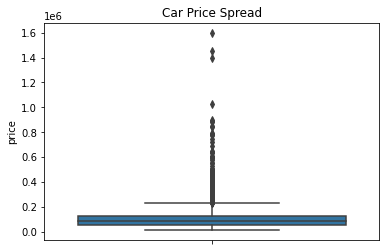

count    3.002000e+03
mean     1.114245e+05
std      1.067789e+05
min      1.000000e+04
25%      5.490000e+04
50%      8.790000e+04
75%      1.250000e+05
max      1.600000e+06
Name: price, dtype: float64


In [220]:
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)
plt.show()
print(cars.price.describe())

In [221]:
c = cars['price'].sort_values(ascending = False)
#we saw that there is big scale of prices , We assume that there is a direct relationship 
#between the type of vehicle and the price 
#so we expect to see that the high prices are from some specific types of expensive vehicles
cars[['CompanyName', 'price' , 'hand']].sort_values(by = 'price' , ascending = False)

,CompanyName,price,hand
index,,,
2867,מרצדס,1600000,1
3412,פורשה,1450000,2
3039,ב.מ.וו,1399000,1
164,מרצדס,1030000,1
2977,ב.מ.וו,894719,1
...,...,...,...
4353,פיאט,11990,3
3043,רנו,11990,5
1285,פולקסווגן,11500,5


In [224]:
#cars['annual_licensing_fee'].astype(int):

def cov(value):
    if type(value) != int:
        value = value.replace('\u200f', '').replace('\xa0₪', '').replace(',', '')
        return int(value)
    return value
    
cars['annual_licensing_fee'] = cars['annual_licensing_fee'].apply(cov)
cars

,version,year,CompanyName,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,2021,קופרה,1498 ליטר בנזין,"10,000",1,1,לבן,פרטית,5,2417,445.0,176000
1,טויוטה קורולה GLI,2011,טויוטה,1598 ליטר בנזין,"71,000",2,1,כסף,פרטית,4,1262,454.5,45000
2,קיה פיקנטו LX,2020,קיה,1248 ליטר בנזין,"16,500",2,1,לבן,פרטית,9,1235,359.5,79900
3,הונדה סיוויק COMFORT,2014,הונדה,1798 ליטר בנזין,"144,000",2,1,אפור,חברה,2,1424,430.0,44900
4,פיאט 500 1.2 POP STAR,2017,פיאט,1242 ליטר בנזין,"69,000",1,1,לבן,פרטית,2,1353,357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,סקודה קודיאק AMBITION,2017,סקודה,1395 ליטר בנזין,"159,800",1,1,זהב,ליסינג,5,2019,448.0,132000
4899,סקודה פאביה AMBITION,2016,סקודה,1197 ליטר בנזין,"140,000",3,1,שחור מטלי,ליסינג,4,1102,399.2,59000
4903,מאזדה 3,2020,מאזדה,1998 ליטר בנזין,"14,500",1,1,אפור,פרטית,11,2130,466.0,130500


In [225]:
#adding 'engine_size' col
engine_size = cars ['engine'].apply (lambda x : x.split (' ')[0])
cars.insert( cars.columns.get_loc("engine") , "engine_size" , engine_size)
cars

,version,year,CompanyName,engine_size,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,2021,קופרה,1498,1498 ליטר בנזין,"10,000",1,1,לבן,פרטית,5,2417,445.0,176000
1,טויוטה קורולה GLI,2011,טויוטה,1598,1598 ליטר בנזין,"71,000",2,1,כסף,פרטית,4,1262,454.5,45000
2,קיה פיקנטו LX,2020,קיה,1248,1248 ליטר בנזין,"16,500",2,1,לבן,פרטית,9,1235,359.5,79900
3,הונדה סיוויק COMFORT,2014,הונדה,1798,1798 ליטר בנזין,"144,000",2,1,אפור,חברה,2,1424,430.0,44900
4,פיאט 500 1.2 POP STAR,2017,פיאט,1242,1242 ליטר בנזין,"69,000",1,1,לבן,פרטית,2,1353,357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,סקודה קודיאק AMBITION,2017,סקודה,1395,1395 ליטר בנזין,"159,800",1,1,זהב,ליסינג,5,2019,448.0,132000
4899,סקודה פאביה AMBITION,2016,סקודה,1197,1197 ליטר בנזין,"140,000",3,1,שחור מטלי,ליסינג,4,1102,399.2,59000
4903,מאזדה 3,2020,מאזדה,1998,1998 ליטר בנזין,"14,500",1,1,אפור,פרטית,11,2130,466.0,130500


# is_x for 'company'

In [226]:
car_names = cars.CompanyName.unique()
car_names
#for x in car_names:
    #print(x + "\t" + itemToEnglish(x))

array(['קופרה', 'טויוטה', 'קיה', 'הונדה', 'פיאט', 'סיאט', 'יונדאי', 'MG',
       'סקודה', 'מאזדה', 'שברולט', 'ניסאן', 'טסלה', 'רנו', "פיג'ו",
       'סוזוקי', 'פולקסווגן', "ג'יפ", 'פורד', 'סובארו', 'מיצובישי',
       'ב.מ.וו', 'סיטרואן', 'אאודי', 'לקסוס', 'מרצדס', 'איסוזו', 'אופל',
       'קרייזלר', 'וולבו', 'לנד', "דאצ'יה", 'מיני', 'סאנגיונג', 'ביואיק',
       'אלפא', 'אינפיניטי', "דודג'", 'קאדילאק', 'SERES', 'סמארט', 'DS',
       'פורשה', 'דייהטסו', 'מזארטי', 'GAC'], dtype=object)

In [227]:
#adding col for each company - is_*companyName*

for x in car_names:
    engX = itemToEnglish(x)
    currentCol = cars['CompanyName'].apply(lambda t : 1 if t == x else 0)
    strCol = "is_" + engX
    cars.insert(3, strCol, currentCol)

#cars = cars.drop(columns="is_toyota")

In [118]:
cars

,version,year,CompanyName,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,2021,קופרה,0,0,0,0,0,0,0,...,1498 ליטר בנזין,"10,000",1,1,לבן,פרטית,5,2417,445.0,176000
1,טויוטה קורולה GLI,2011,טויוטה,0,0,0,0,0,0,0,...,1598 ליטר בנזין,"71,000",2,1,כסף,פרטית,4,1262,454.5,45000
2,קיה פיקנטו LX,2020,קיה,0,0,0,0,0,0,0,...,1248 ליטר בנזין,"16,500",2,1,לבן,פרטית,9,1235,359.5,79900
3,הונדה סיוויק COMFORT,2014,הונדה,0,0,0,0,0,0,0,...,1798 ליטר בנזין,"144,000",2,1,אפור,חברה,2,1424,430.0,44900
4,פיאט 500 1.2 POP STAR,2017,פיאט,0,0,0,0,0,0,0,...,1242 ליטר בנזין,"69,000",1,1,לבן,פרטית,2,1353,357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,סקודה קודיאק AMBITION,2017,סקודה,0,0,0,0,0,0,0,...,1395 ליטר בנזין,"159,800",1,1,זהב,ליסינג,5,2019,448.0,132000
4899,סקודה פאביה AMBITION,2016,סקודה,0,0,0,0,0,0,0,...,1197 ליטר בנזין,"140,000",3,1,שחור מטלי,ליסינג,4,1102,399.2,59000
4903,מאזדה 3,2020,מאזדה,0,0,0,0,0,0,0,...,1998 ליטר בנזין,"14,500",1,1,אפור,פרטית,11,2130,466.0,130500


In [228]:
#check
cars.where(cars.is_subaru == 1).dropna()

,version,year,CompanyName,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,,,,,,,,,
70,סובארו אימפרזה B3 RX,2010.0,סובארו,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1498 ליטר בנזין,"102,000",1.0,1.0,אפור מטל,פרטית,3,1262.0,458.0,24500.0
176,סובארו XV 1.6 EYESIGHT,2018.0,סובארו,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1600 ליטר בנזין,"70,500",1.0,1.0,לבן,ליסינג,10,1835.0,446.5,99900.0
299,סובארו B4 CLASSIC,2017.0,סובארו,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2498 ליטר בנזין,"134,000",1.0,1.0,לבן,השכרה,2,2019.0,479.5,66000.0
355,סובארו פורסטר 2.0Z,2018.0,סובארו,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1995 ליטר בנזין,"97,000",1.0,1.0,לבן,ליסינג,3,2019.0,461.0,110000.0
391,סובארו XV 2.0 PREMIUM,2016.0,סובארו,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1995 ליטר בנזין,"179,000",1.0,1.0,תכלת מטאלי,פרטית,1,2019.0,445.0,74900.0
462,סובארו XV CROSSTYLE,2021.0,סובארו,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1995 ליטר בנזין,"14,000",2.0,1.0,לבן,פרטית,1,2130.0,446.5,138000.0
541,סובארו אימפרזה B3 RX,2010.0,סובארו,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1498 ליטר בנזין,"181,000",2.0,1.0,אפור,פרטית,2,1262.0,458.0,21000.0
610,סובארו אימפרזה B3 XV,2011.0,סובארו,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1994 ליטר בנזין,"129,662",3.0,1.0,שחור,פרטית,5,1369.0,443.0,44900.0
650,סובארו XV 2.0I,2016.0,סובארו,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1995 ליטר בנזין,"155,000",2.0,1.0,לבן,ליסינג,6,1835.0,445.0,69900.0


# is_x for 'original_ownership'

In [229]:
def xToEnglish(x):
    if (x == 'פרטית'):
        return 'private'
    if (x == 'ליסינג'):
        return 'leasing'
    if (x == 'השכרה'):
        return 'rented'
    if (x == 'חברה'):
        return 'company'
    else:
        return 'private_import'

ownerOptions = cars['original_onership'].unique()

In [230]:
#cars['original_onership'].unique()
cars.columns.get_loc("original_onership")

55

In [ ]:
for x in ownerOptions:
    engX = xToEnglish(x)
    currentCol = cars['original_onership'].apply(lambda t : 1 if t == x else 0)
    strCol = "is_" + engX
    cars.insert(cars.columns.get_loc("original_onership")+1, strCol, currentCol)

In [232]:
cars

,version,year,CompanyName,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,original_onership,is_private_import,is_rented,is_leasing,is_company,is_private,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,2021,קופרה,0,0,0,0,0,0,0,...,פרטית,0,0,0,0,1,5,2417,445.0,176000
1,טויוטה קורולה GLI,2011,טויוטה,0,0,0,0,0,0,0,...,פרטית,0,0,0,0,1,4,1262,454.5,45000
2,קיה פיקנטו LX,2020,קיה,0,0,0,0,0,0,0,...,פרטית,0,0,0,0,1,9,1235,359.5,79900
3,הונדה סיוויק COMFORT,2014,הונדה,0,0,0,0,0,0,0,...,חברה,0,0,0,1,0,2,1424,430.0,44900
4,פיאט 500 1.2 POP STAR,2017,פיאט,0,0,0,0,0,0,0,...,פרטית,0,0,0,0,1,2,1353,357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,סקודה קודיאק AMBITION,2017,סקודה,0,0,0,0,0,0,0,...,ליסינג,0,0,1,0,0,5,2019,448.0,132000
4899,סקודה פאביה AMBITION,2016,סקודה,0,0,0,0,0,0,0,...,ליסינג,0,0,1,0,0,4,1102,399.2,59000
4903,מאזדה 3,2020,מאזדה,0,0,0,0,0,0,0,...,פרטית,0,0,0,0,1,11,2130,466.0,130500


# is_x for 'car_length'

In [233]:
#we based our division on 4 catagories (and the avg between them):
    #mini - 319.5 cm
    #small - 421.5 cm
    #medium - 462 cm
    #larage - 480+ cm

In [234]:
def whatSize(x):
    if (x < 370):
        return 'mini'
    if (x < 421):
        return 'small'
    if (x < 470):
        return 'medium'
    return 'large'

In [235]:
#making a col of mini, small, medium or big car.
#assuming we're measuring in cm.
size_catagory = cars['car_length'].apply(lambda x : whatSize(x))
cars.insert(cars.columns.get_loc("car_length")+1, "size", size_catagory)

In [236]:
sizes = cars['size'].unique()
sizes

array(['medium', 'mini', 'small', 'large'], dtype=object)

In [237]:
#binar col for each size
for x in sizes:
    currentCol = cars['size'].apply(lambda t : 1 if t == x else 0)
    strCol = "" + x
    cars.insert(cars.columns.get_loc("size")+1, strCol, currentCol)

In [ ]:
#if we want to delete a col:
#cars = cars.drop(columns="small")

# Taking care of cars that has "חשמלי" at "engine_size"

In [324]:
#some of our cars are electric, and electric car doesnt have engine_size that measure by liters.
#so we give each electric car an 'engine_size' value, which is the mean size of cars in its size.

foulCarsIndex = cars[cars['engine_size'] == "חשמלי"].index
foul_cars = cars.drop(index = foulCarsIndex)
foul_cars

,index,version,year,CompanyName,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
0,0,קופרה פורמנטור SILVER STORM,2021,קופרה,0,0,0,0,0,0,...,1,5,2417,445.0,medium,0,0,0,1,176000
1,1,טויוטה קורולה GLI,2011,טויוטה,0,0,0,0,0,0,...,1,4,1262,454.5,medium,0,0,0,1,45000
2,2,קיה פיקנטו LX,2020,קיה,0,0,0,0,0,0,...,1,9,1235,359.5,mini,0,0,1,0,79900
3,3,הונדה סיוויק COMFORT,2014,הונדה,0,0,0,0,0,0,...,0,2,1424,430.0,medium,0,0,0,1,44900
4,4,פיאט 500 1.2 POP STAR,2017,פיאט,0,0,0,0,0,0,...,1,2,1353,357.1,mini,0,0,1,0,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,4898,סקודה קודיאק AMBITION,2017,סקודה,0,0,0,0,0,0,...,0,5,2019,448.0,medium,0,0,0,1,132000
2998,4899,סקודה פאביה AMBITION,2016,סקודה,0,0,0,0,0,0,...,0,4,1102,399.2,small,0,1,0,0,59000
2999,4903,מאזדה 3,2020,מאזדה,0,0,0,0,0,0,...,1,11,2130,466.0,medium,0,0,0,1,130500
3000,4904,קרייזלר PT-CRUISE LIMITED,2008,קרייזלר,0,0,0,0,0,0,...,1,3,1427,429.0,medium,0,0,0,1,17000


In [325]:
cars[cars['engine_size'] == "חשמלי"].index

Int64Index([1894, 1896, 2005, 2054, 2253, 2345, 2444, 2801, 2804], dtype='int64')

In [326]:
#classifing the mean of 'engine_size' per car size.
foulCarsIndex = cars[cars['engine_size'] == "חשמלי"].index
foul_cars = cars.drop(index = foulCarsIndex)
foul_cars['engine_size'] = foul_cars['engine_size'].astype(int)
foul_cars = foul_cars.groupby('size').agg({'engine_size' : "mean"})

large = foul_cars.iloc[0,0]
med = foul_cars.iloc[1,0]
mini = foul_cars.iloc[2,0]
small = foul_cars.iloc[3,0]

print(large)
print(med)
print(mini)
print(small)

foul_cars

2467.195426195426
1665.184682237914
1245.497737556561
1348.0355555555554


,engine_size
size,
large,2467.195426
medium,1665.184682
mini,1245.497738
small,1348.035556


In [328]:
large = foul_cars.iloc[0,0]
med = foul_cars.iloc[1,0]
mini = foul_cars.iloc[2,0]
small = foul_cars.iloc[3,0]

ElCarsIndex = cars[cars['engine_size'] == "חשמלי"].index
ElCarsIndex = np.array(ElCarsIndex)

In [329]:
for x in ElCarsIndex:
    if (cars.iloc[x, cars.columns.get_loc("size")] == "large"): 
        cars['engine_size'][x] = large 
    if (cars.iloc[x, cars.columns.get_loc("size")] == "medium"): 
        cars['engine_size'][x] = med
    if (cars.iloc[x, cars.columns.get_loc("size")] == "mini"): 
        cars['engine_size'][x] = mini
    if (cars.iloc[x, cars.columns.get_loc("size")] == "small"): 
        cars['engine_size'][x] = small

<ipython-input-329-dcb883da0a38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['engine_size'][x] = small
<ipython-input-329-dcb883da0a38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['engine_size'][x] = large
<ipython-input-329-dcb883da0a38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['engine_size'][x] = med


In [330]:
cars['engine_size'] = cars['engine_size'].astype(int)

# Dropping the top percent

In [331]:
#drop one percent of the most expensive cars.
onePercent = int(cars.price.count() / 100)
ind = cars.sort_values(by = "price" , ascending=False).price.head(onePercent).index

for x in ind:
    cars.drop(index=x, inplace=True)

In [332]:
#for fun = watch the most expensive cars
cars.sort_values(by = "price" , ascending=False).price.head(onePercent)

2901    500000
2315    499000
1234    499000
2302    485000
2005    485000
1395    480000
1291    480000
2795    479000
1423    475000
1981    471000
135     469000
1091    469000
2272    460000
685     459000
1219    456000
2314    455000
2919    452000
2171    450000
1182    449900
2237    449900
1876    449000
647     445000
1314    445000
1834    441600
1166    437320
1260    435000
483     435000
1079    432600
2751    432600
382     430000
Name: price, dtype: int64

In [333]:
cars

,index,version,year,CompanyName,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
0,0,קופרה פורמנטור SILVER STORM,2021,קופרה,0,0,0,0,0,0,...,1,5,2417,medium,medium,0,0,0,1,176000
1,1,טויוטה קורולה GLI,2011,טויוטה,0,0,0,0,0,0,...,1,4,1262,454.5,medium,0,0,0,1,45000
2,2,קיה פיקנטו LX,2020,קיה,0,0,0,0,0,0,...,1,9,1235,359.5,mini,0,0,1,0,79900
3,3,הונדה סיוויק COMFORT,2014,הונדה,0,0,0,0,0,0,...,0,2,1424,430.0,medium,0,0,0,1,44900
4,4,פיאט 500 1.2 POP STAR,2017,פיאט,0,0,0,0,0,0,...,1,2,1353,357.1,mini,0,0,1,0,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,4898,סקודה קודיאק AMBITION,2017,סקודה,0,0,0,0,0,0,...,0,5,2019,448.0,medium,0,0,0,1,132000
2998,4899,סקודה פאביה AMBITION,2016,סקודה,0,0,0,0,0,0,...,0,4,1102,399.2,small,0,1,0,0,59000
2999,4903,מאזדה 3,2020,מאזדה,0,0,0,0,0,0,...,1,11,2130,466.0,medium,0,0,0,1,130500
3000,4904,קרייזלר PT-CRUISE LIMITED,2008,קרייזלר,0,0,0,0,0,0,...,1,3,1427,429.0,medium,0,0,0,1,17000


### making 'current_mileage' to int

In [344]:
cars['current_mileage'] = cars['current_mileage'].apply(lambda x : x.replace(',', ''))

In [345]:
cars['current_mileage']

0        10000
1        71000
2        16500
3       144000
4        69000
         ...  
2997    159800
2998    140000
2999     14500
3000    163000
3001      2000
Name: current_mileage, Length: 2972, dtype: object

In [347]:
cars.to_csv(r'C:\Users\Alon\Desktop\קורסים\מדעי הנתונים\cars_data_lvl2done.csv', index_label='index')

In [3]:
cars = pd.read_csv(r'C:\Users\Alon\Desktop\קורסים\מדעי הנתונים\cars_data_lvl2done.csv', index_col  = 'index')

In [11]:
cars.columns

Index(['index.1', 'version', 'year', 'CompanyName', 'is_GAC', 'is_maserati',
       'is_daihatsu', 'is_porsche', 'is_ds', 'is_smart', 'is_seres',
       'is_cadillac', 'is_דודג'', 'is_infinity', 'is_alfa-romeo', 'is_buick',
       'is_sangiang', 'is_mini', 'is_dacia', 'is_landrover', 'is_volvo',
       'is_chrysler', 'is_opel', 'is_isuzu', 'is_mercedes', 'is_lexus',
       'is_audi', 'is_citroen', 'is_bmw', 'is_mitsubishi', 'is_subaru',
       'is_ford', 'is_jeep', 'is_volkswagen', 'is_suzuki', 'is_peugeot',
       'is_reno', 'is_tesla', 'is_nissan', 'is_chevrolet', 'is_mazda',
       'is_skoda', 'is_MG', 'is_hyundai', 'is_siat', 'is_fiat', 'is_honda',
       'is_kia', 'is_toyota', 'is_cupra', 'engine_size', 'engine',
       'current_mileage', 'hand', 'gearBox', 'color', 'original_onership',
       'is_private_import', 'is_rented', 'is_leasing', 'is_company',
       'is_private', 'next_test_in', 'annual_licensing_fee', 'car_length',
       'size', 'large', 'small', 'mini', 'medium', 'p

In [152]:
features = cars[["year", "annual_licensing_fee", "engine_size", "next_test_in" , "current_mileage"]]
features = features.columns
print(f"Total features: {len(features)}")

Total features: 5


In [159]:
import random

def randomColor():
    r1 = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r1(),r1(),r1())

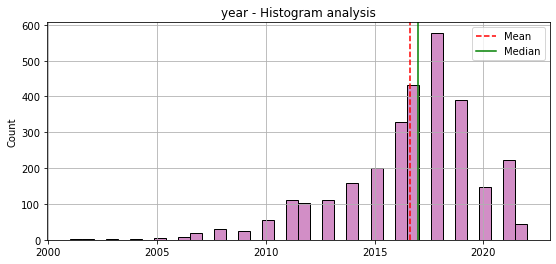

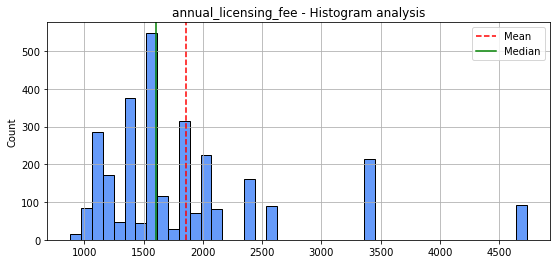

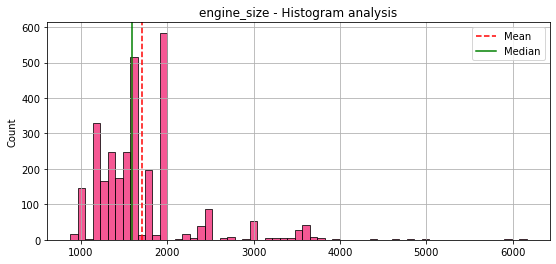

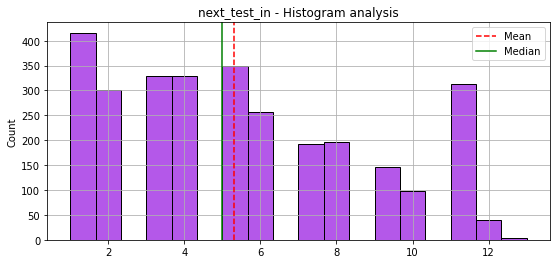

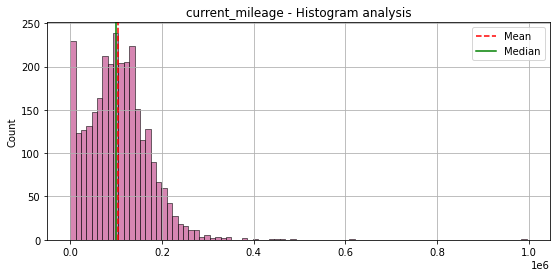

In [220]:
def graphPerCol(df: dict, fields: list):
    for field in fields:
        f, (ax1) = plt.subplots(1, 1, figsize=(9, 4))
        v_dist_1 = df[field].values
        sns.histplot(v_dist_1, ax=ax1, color=randomColor())

        mean=df[field].mean() #ממוצע
        median=df[field].median() #חציון

        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Median")
        ax1.legend()
        plt.grid()
        plt.title(f"{field} - Histogram analysis")

graphPerCol(cars, features)

In [94]:
carsValuedCols = cars[["year", "annual_licensing_fee", "engine_size", "hand",
                       "next_test_in" , "current_mileage", "car_length", "price"]]

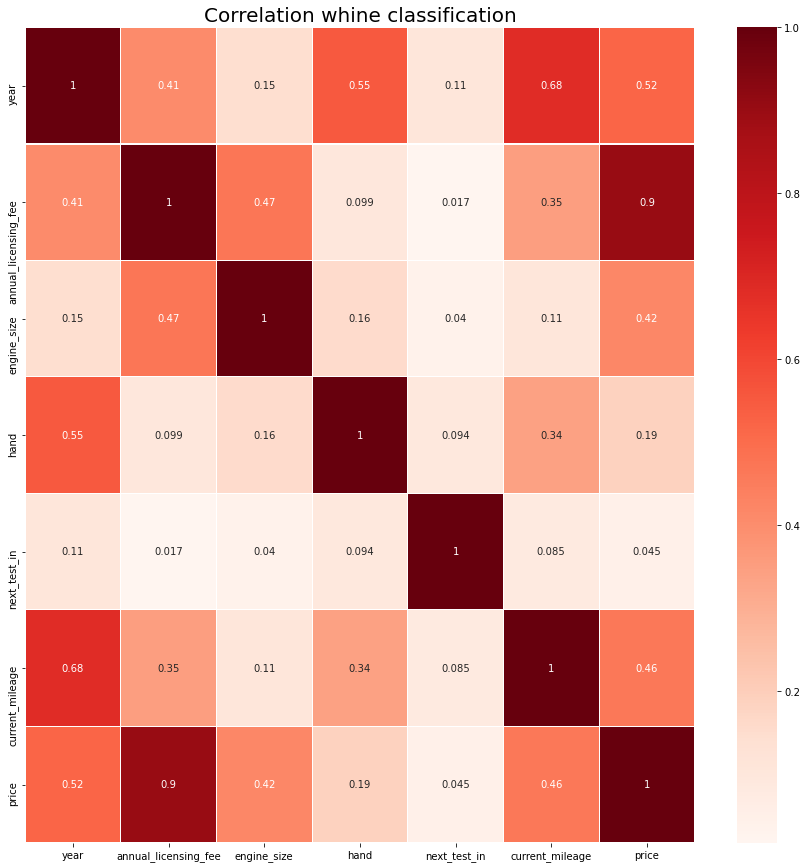

In [86]:
def get_headmap(carsValuedCols: dict):
    corr = carsValuedCols.corr().abs()
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, annot=True, cmap="Reds", linewidths=0.1, annot_kws={"fontsize":10})
    plt.title("Correlation whine classification", size=20)
get_headmap(carsValuedCols)

In [148]:
corr_matrix = cars.corr()
corr_matrix["price"].sort_values(ascending = False).abs()

price                   1.000000
annual_licensing_fee    0.900354
year                    0.522056
engine_size             0.420062
is_mercedes             0.388515
                          ...   
small                   0.159597
mini                    0.175787
hand                    0.187873
is_leasing              0.214572
current_mileage         0.464100
Name: price, Length: 64, dtype: float64

In [149]:
car_names = cars.CompanyName.unique()
corol_com = np.zeros(len(car_names))
counter = 0

for x in car_names:
    tempStr = "is_" + itemToEnglish(x)
    corol_com[counter] = abs(corr_matrix["price"].sort_values(ascending = False)[tempStr])
    counter = counter+1;

In [182]:
NUM_OF_GRAPH = 2
arr = np.arange(0, NUM_OF_GRAPH)
arr

array([0, 1])

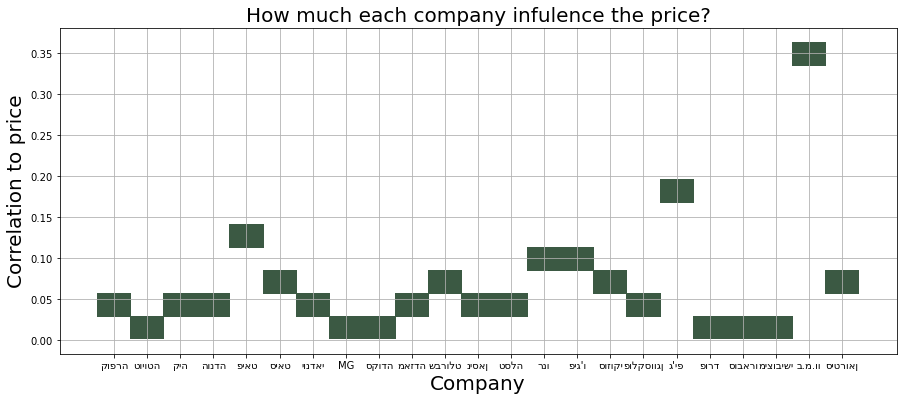

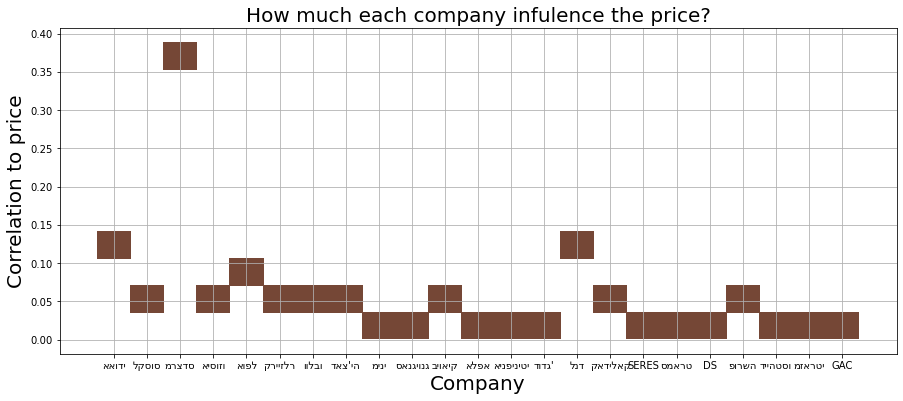

In [245]:
def splitGraph(car_names, corol_com):
    for x in arr:
        #plt.subplots(1, 1, figsize=(20, 6))
        
        f, (ax1) = plt.subplots(1, 1, figsize=(15, 6))
        xCol = car_names[int(len(car_names)/2*x):int(len(car_names)/2*(x+1))]
        yCol = corol_com[int(len(car_names)/2*x):int(len(car_names)/2*(x+1))]
        sns.histplot(y=  yCol, x = xCol, ax=ax1, color=randomColor())
        
        plt.grid()
        plt.xlabel('Company', size = 20)
        plt.ylabel('Correlation to price', size = 20)
        plt.title('How much each company infulence the price?', size = 20)

splitGraph(car_names, corol_com)